# Problem -

Perform Principal component analysis,

Perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve), and

Obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data

(class column we have ignored at the begining who shows it has 3 clusters)df

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
wine_df= pd.read_csv('C:/Users/ancha/Downloads/wine.csv')
wine_df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# EDA

In [4]:
wine_df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
wine_df.shape

(178, 14)

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
wine_df.duplicated().value_counts()

False    178
dtype: int64

# Standardizing Data for PCA

In [8]:
#Removing Type feature in Original data
wine_df1= wine_df.iloc[:,1:]
wine_df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
ss= StandardScaler()
wine_ss=ss.fit_transform(wine_df1)
wine_ss

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# PCA

In [11]:
pca= PCA(n_components=3)
pca_compo= pd.DataFrame(pca.fit_transform(wine_ss),columns=['pc1','pc2','pc3'])
pca_compo

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


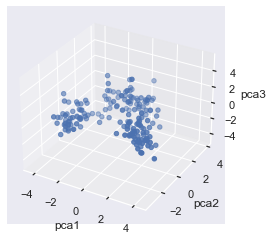

In [13]:
#Plot between pc1,pc2,pc3
sns.set(style= 'darkgrid')

fig= plt.figure()
ax= fig.add_subplot(111, projection= '3d')
x= pca_compo.pc1
y= pca_compo.pc2
z= pca_compo.pc3

ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')

ax.scatter(x, y, z)
plt.show()

# Observation on possible number of components:

In [14]:
pca=PCA(n_components=7)
pca_values= pca.fit_transform(wine_ss)
pca_values

array([[ 3.31675081, -1.44346263, -0.16573904, ...,  0.69304284,
        -0.22388013,  0.59642655],
       [ 2.20946492,  0.33339289, -2.02645737, ..., -0.25765463,
        -0.92712024,  0.05377561],
       [ 2.51674015, -1.0311513 ,  0.98281867, ..., -0.25103312,
         0.54927605,  0.42420545],
       ...,
       [-2.67783946, -2.76089913, -0.94094188, ...,  1.271355  ,
         0.27306792,  0.67923541],
       [-2.38701709, -2.29734668, -0.5506962 , ...,  0.81395522,
         1.17878298,  0.63397527],
       [-3.20875816, -2.76891957,  1.01391366, ..., -0.89519259,
         0.29609218,  0.00574126]])

In [15]:
#Amount of variance that each PCA explains.
var= pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679])

In [16]:
#Cumsum variance
var1= np.cumsum(np.round(var, decimals= 4)* 100)
var1

array([36.2 , 55.41, 66.53, 73.6 , 80.16, 85.1 , 89.34])

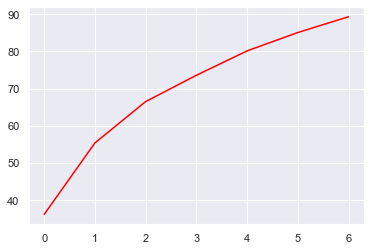

In [17]:
#Variance plot for PCA components obtained
plt.plot(var1, color= 'red')

In [18]:
#Final Dataframe.
wine_final= pca_compo.copy()
wine_final

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


90% of the data has been absorbed by 3 components.

# Hierarchical Clustering:

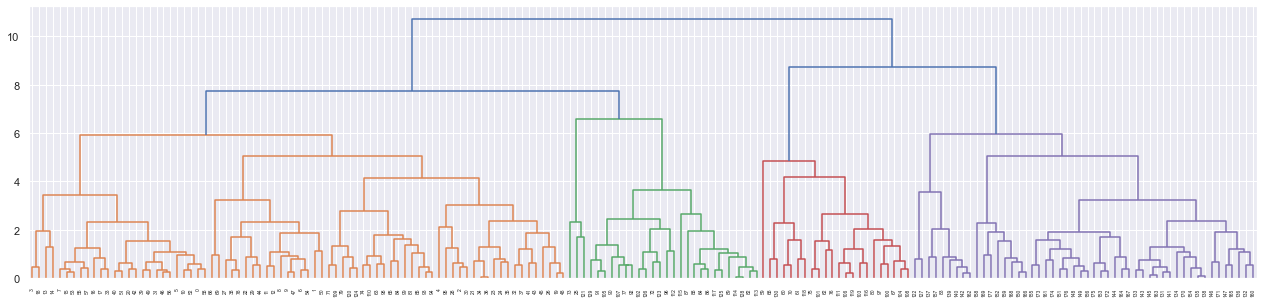

In [22]:
#Dendogram
plt.figure(figsize=(22,5))
dendrogram= sch.dendrogram(sch.linkage(wine_final, method='complete'))

In [23]:
#Creating Clusters
hc= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
hc.fit(wine_final)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [24]:
#Saving clusters
y_hc= hc.fit_predict(wine_final)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [30]:
wine_hier= wine_final.copy()
wine_hier['h_clusterid']=y_hc
wine_hier.head()

,pc1,pc2,pc3,h_clusterid
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0


In [27]:
wine_hier[wine_hier['h_clusterid']==0]

,pc1,pc2,pc3,h_clusterid
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0
...,...,...,...,...
124,0.978474,1.445570,1.481237,0
125,-0.096810,2.109998,0.434826,0
126,0.038487,1.266762,0.687578,0
128,-0.479565,1.938841,1.296508,0


In [28]:
wine_hier[wine_hier['h_clusterid']==1]

,pc1,pc2,pc3,h_clusterid
83,-2.538977,0.087443,0.474251,1
122,-1.177087,0.663967,3.010222,1
127,-1.597159,1.208144,3.361176,1
131,-2.384501,-0.374583,-0.723823,1
132,-2.936940,-0.263862,-0.167640,1
133,-2.146811,-0.368255,-0.453301,1
134,-2.369869,0.459635,-1.101400,1
135,-3.063842,-0.353413,-1.099124,1
136,-3.915754,-0.154583,0.221828,1
137,-3.936463,-0.659687,1.712215,1


In [29]:
wine_hier[wine_hier['h_clusterid']==2]

,pc1,pc2,pc3,h_clusterid
59,-0.928582,3.073486,-4.585064,2
60,-1.542480,1.381444,-0.874683,2
61,-1.836250,0.829984,-1.605702,2
62,0.030607,1.262786,-1.784408,2
67,0.183384,2.427146,-1.069746,2
68,-0.812805,0.220514,-0.707005,2
70,-1.572216,0.884983,-0.628998,2
75,-0.867993,2.444101,-1.563333,2
76,0.370014,2.153907,-2.449386,2
80,0.762064,3.375054,-0.357470,2


In [31]:
wine_hier['h_clusterid'].value_counts()

0    106
1     50
2     22
Name: h_clusterid, dtype: int64

In [33]:
wine_hier.groupby('h_clusterid').agg(['mean'])

,pc1,pc2,pc3
,mean,mean,mean
h_clusterid,,,
0,1.379516,0.140081,0.252432
1,-2.717994,-1.149057,-0.022672
2,-0.469499,1.936559,-1.164734


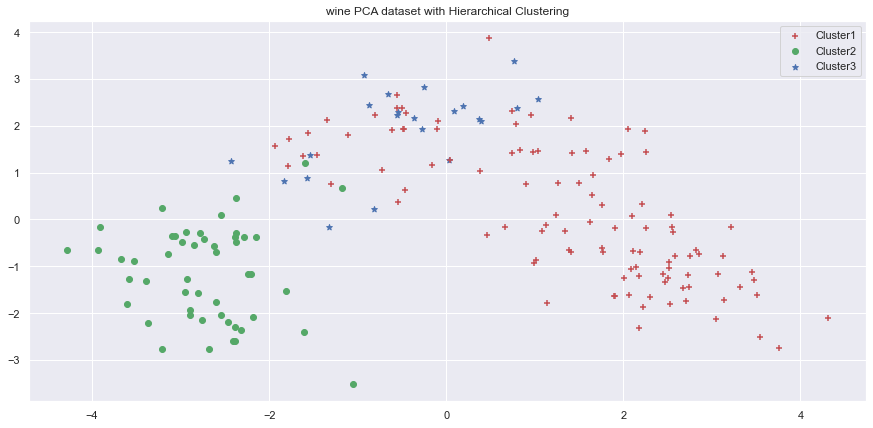

In [35]:
#Plotting Clusters

pca = PCA(n_components=3).fit(wine_ss)
pca_2d = pca.transform(wine_ss)

import pylab as pl

plt.figure(figsize=(15,7))
for i in range(0, pca_2d.shape[0]):
    if wine_hier.h_clusterid[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif wine_hier.h_clusterid[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif wine_hier.h_clusterid[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
        
pl.legend([c1, c2, c3], ['Cluster1', 'Cluster2',
    'Cluster3'])
pl.title('wine PCA dataset with Hierarchical Clustering')
pl.show()

# K- Means:

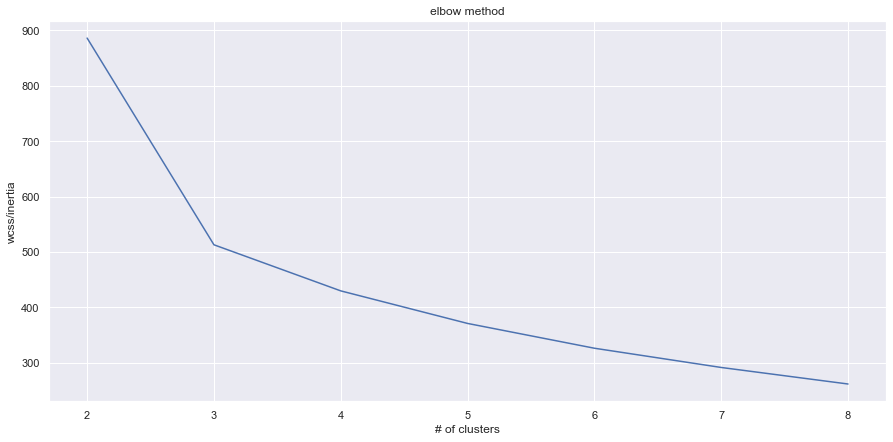

In [36]:
#elbow method.

plt.figure(figsize=(15,7))
wcss = []
for i in range(2, 9):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine_final)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2, 9), wcss)
plt.title('elbow method')
plt.xlabel('# of clusters')
plt.ylabel('wcss/inertia')
plt.show()

In [37]:
#Cluster algorithm
clusters_new= KMeans(3, random_state=40)
clusters_new.fit(wine_final)

KMeans(n_clusters=3, random_state=40)

In [38]:
#Assigning clusters
wine_kmean= wine_final.copy()
wine_kmean['kmeans_clusterid']= clusters_new.labels_
wine_kmean.head()

,pc1,pc2,pc3,kmeans_clusterid
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


In [39]:
wine_kmean[wine_kmean['kmeans_clusterid']==0]

,pc1,pc2,pc3,kmeans_clusterid
61,-1.836250,0.829984,-1.605702,0
83,-2.538977,0.087443,0.474251,0
118,-2.433013,1.257141,-1.903027,0
130,-1.327102,-0.170389,-1.180013,0
131,-2.384501,-0.374583,-0.723823,0
132,-2.936940,-0.263862,-0.167640,0
133,-2.146811,-0.368255,-0.453301,0
134,-2.369869,0.459635,-1.101400,0
135,-3.063842,-0.353413,-1.099124,0
136,-3.915754,-0.154583,0.221828,0


In [40]:
wine_kmean[wine_kmean['kmeans_clusterid']==1]

,pc1,pc2,pc3,kmeans_clusterid
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
57,2.173741,-1.212200,0.261780,1
58,3.139380,-1.731579,-0.285661,1
73,2.562227,-0.260199,3.374394,1
95,2.543865,-0.169274,0.788697,1


In [41]:
wine_kmean[wine_kmean['kmeans_clusterid']==2]

,pc1,pc2,pc3,kmeans_clusterid
59,-0.928582,3.073486,-4.585064,2
60,-1.542480,1.381444,-0.874683,2
62,0.030607,1.262786,-1.784408,2
63,2.050262,1.925033,-0.007369,2
64,-0.609681,1.908059,0.679358,2
...,...,...,...,...
125,-0.096810,2.109998,0.434826,2
126,0.038487,1.266762,0.687578,2
127,-1.597159,1.208144,3.361176,2
128,-0.479565,1.938841,1.296508,2


In [42]:
wine_kmean['kmeans_clusterid'].value_counts()

2    65
1    62
0    51
Name: kmeans_clusterid, dtype: int64

In [44]:
wine_kmean.groupby('kmeans_clusterid').agg(['mean'])

,pc1,pc2,pc3
,mean,mean,mean
kmeans_clusterid,,,
0,-2.720036,-1.125651,-0.239093
1,2.276194,-0.932054,0.001528
2,-0.036957,1.772239,0.186139


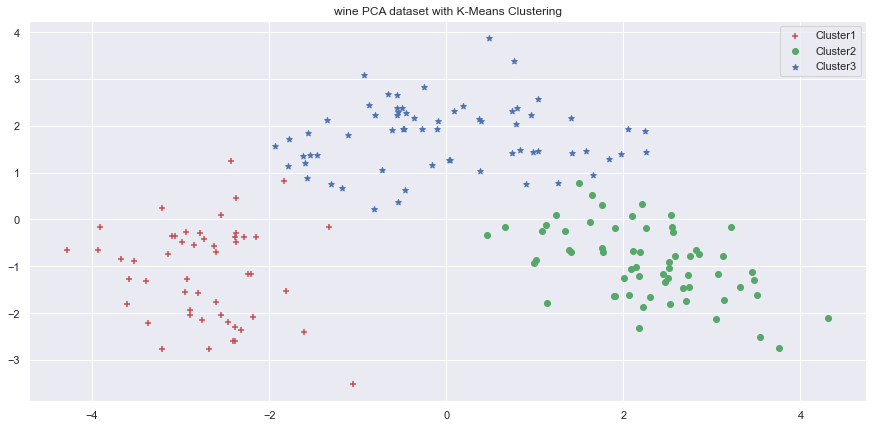

In [45]:
#Plotting Clusters

pca = PCA(n_components=3).fit(wine_ss)
pca_2d = pca.transform(wine_ss)

import pylab as pl

plt.figure(figsize=(15,7))
for i in range(0, pca_2d.shape[0]):
    if wine_kmean.kmeans_clusterid[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif wine_kmean.kmeans_clusterid[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif wine_kmean.kmeans_clusterid[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
        
pl.legend([c1, c2, c3], ['Cluster1', 'Cluster2',
    'Cluster3'])
pl.title('wine PCA dataset with K-Means Clustering')
pl.show()

# DBSCAN:

In [46]:
dbscan=DBSCAN(eps=1,min_samples=3)
dbscan.fit_predict(wine_final)

array([ 0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,
        0,  0, -1, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [49]:
wine_dbscan=wine_final.copy()
wine_dbscan['dbscan_clusterid'] = dbscan.labels_
wine_dbscan['dbscan_clusterid'].value_counts()

 0    157
-1     21
Name: dbscan_clusterid, dtype: int64

In [50]:
wine_dbscan.groupby('dbscan_clusterid').agg(['mean'])

,pc1,pc2,pc3
,mean,mean,mean
dbscan_clusterid,,,
-1,-0.102808,0.310837,0.602451
0,0.013751,-0.041577,-0.080583


In [52]:
wine_dbscan[wine_dbscan.dbscan_clusterid==-1]

,pc1,pc2,pc3,dbscan_clusterid
1,2.209465,0.333393,-2.026457,-1
4,1.008908,-0.869831,2.026688,-1
14,4.312784,-2.095976,-1.263913,-1
25,0.990079,-0.940667,3.820908,-1
50,3.214917,-0.166992,-1.973572,-1
59,-0.928582,3.073486,-4.585064,-1
62,0.030607,1.262786,-1.784408,-1
68,-0.812805,0.220514,-0.707005,-1
73,2.562227,-0.260199,3.374394,-1
76,0.370014,2.153907,-2.449386,-1


In [53]:
wine_dbscan[wine_dbscan.dbscan_clusterid==0]

,pc1,pc2,pc3,dbscan_clusterid
0,3.316751,-1.443463,-0.165739,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
5,3.050254,-2.122401,-0.629396,0
6,2.449090,-1.174850,-0.977095,0
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0
174,-2.601956,-1.757229,0.207581,0
175,-2.677839,-2.760899,-0.940942,0
176,-2.387017,-2.297347,-0.550696,0


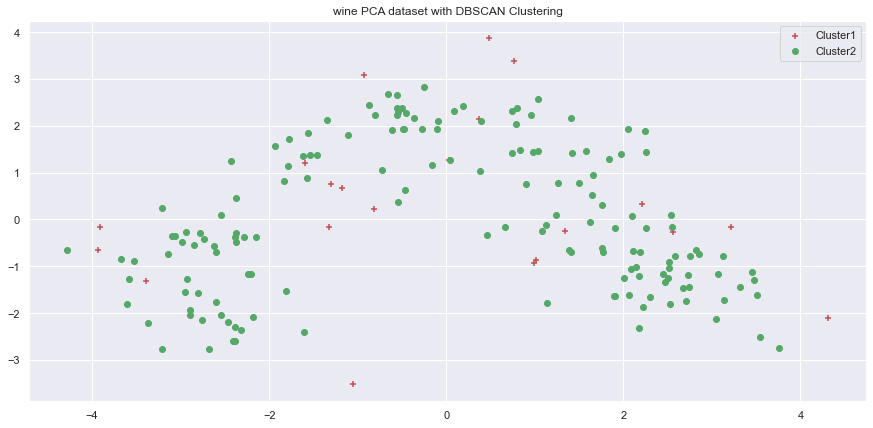

In [54]:
#plotting clusters
pca = PCA(n_components=3).fit(wine_ss)
pca_2d = pca.transform(wine_ss)

import pylab as pl

plt.figure(figsize=(15,7))
for i in range(0, pca_2d.shape[0]):
    if wine_dbscan.dbscan_clusterid[i] == -1:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif wine_dbscan.dbscan_clusterid[i] == 0:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
        
pl.legend([c1, c2], ['Cluster1', 'Cluster2'])
pl.title('wine PCA dataset with DBSCAN Clustering')
pl.show()

# Original, Hierarchical and K-Means

In [56]:
all_cluster=pd.concat([wine_df['Type'],wine_hier['h_clusterid']+1,  wine_kmean['kmeans_clusterid']+1], axis = 1)
all_cluster

,Type,h_clusterid,kmeans_clusterid
0,1,1,2
1,1,1,2
2,1,1,2
3,1,1,2
4,1,1,2
...,...,...,...
173,3,2,1
174,3,2,1
175,3,2,1
176,3,2,1


# Conclusion:

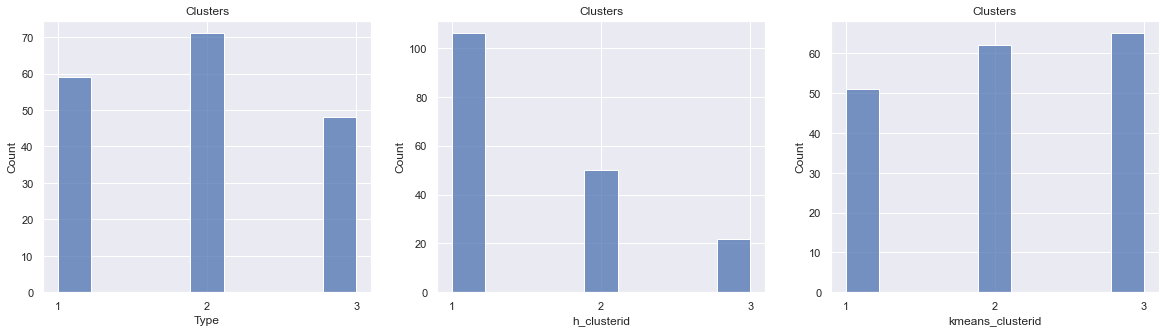

In [59]:
#comparing all tried method:

labels = [1, 2, 3]
plt.figure(figsize=(20,5))
for i, column in enumerate(all_cluster.columns, 1):
  plt.subplot(1,3,i)
  sns.histplot(all_cluster[column])
  plt.title('Clusters')
  plt.xticks( labels)

The original cluster is normally distributed and Hierarchical is right skewed, the difference is after PCA scaling in Hierarchical clustering.

DBSCAN is adding more points to the single cluster, hence there are outliers.

Clustering is better when there are 3 in number, as in the original dataset TYPE feature.